In [37]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#load the data
df = pd.read_csv('netflix_titles.csv')

In [39]:
#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

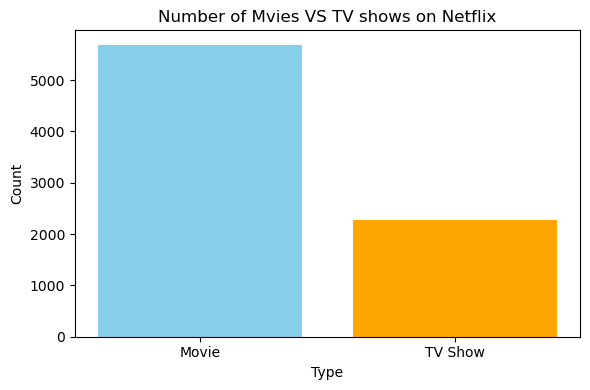

In [40]:
#count NO. of Movies and TV shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values,color = ['skyblue','orange'])
plt.title('Number of Mvies VS TV shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

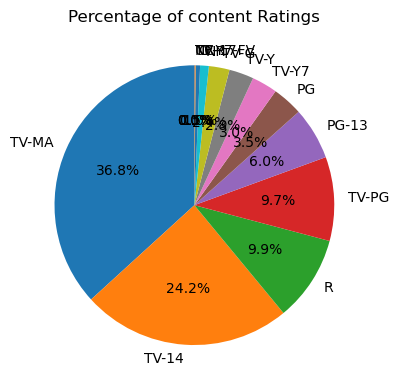

In [41]:
#count Ratings
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(rating_counts,labels = rating_counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Percentage of content Ratings')
plt.tight_layout()
plt.show()

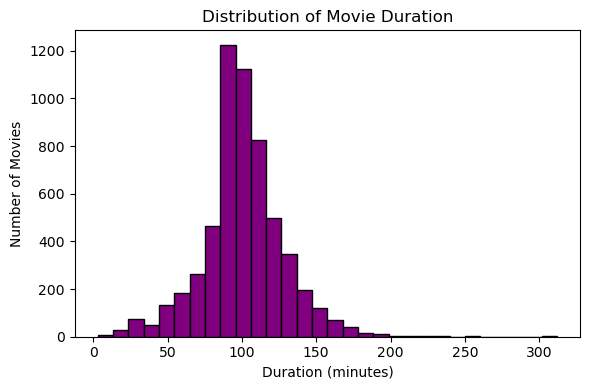

In [42]:
#Dristribution of Duration of Movies
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize = (6,4))
plt.hist(movie_df['duration_int'],bins = 30, color = 'purple', edgecolor = 'black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

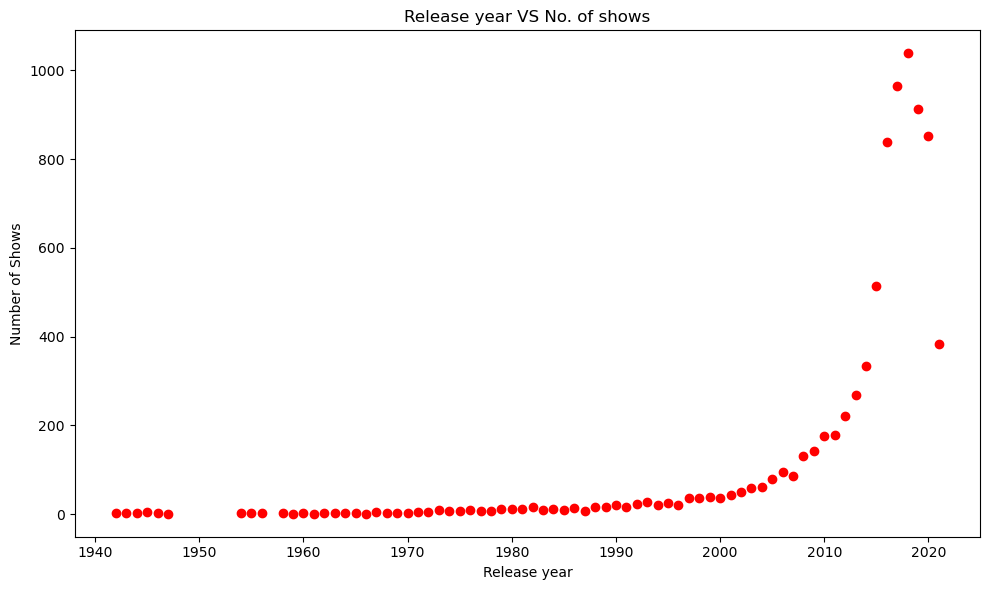

In [43]:
#Release year VS No. of shows
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index,release_counts.values, color = 'red')
plt.title('Release year VS No. of shows')
plt.xlabel('Release year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()

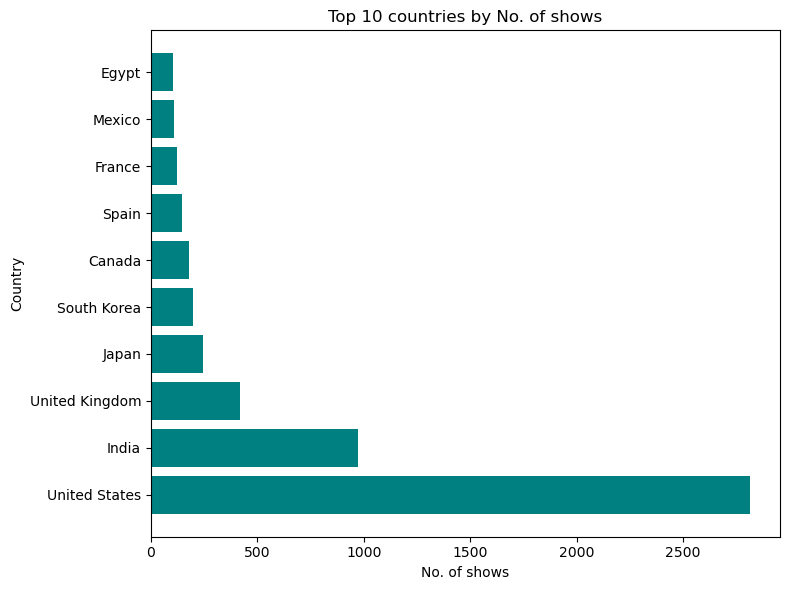

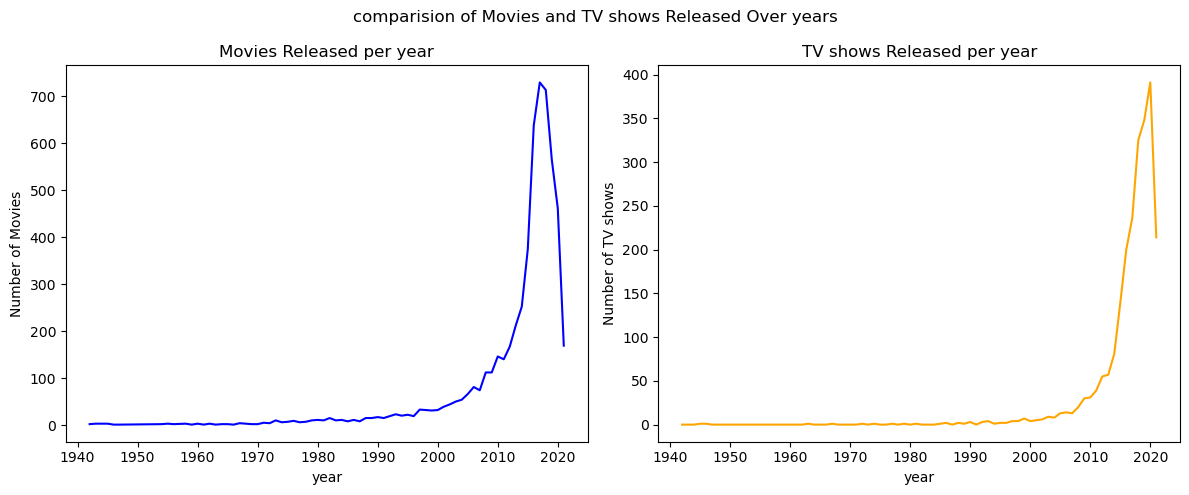

In [44]:
#MAX No. of shows from top 10 countries
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.barh(country_counts.index,country_counts.values, color = 'teal')
plt.title('Top 10 countries by No. of shows')
plt.xlabel('No. of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#count for Movies and TV shows per year
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig , ax = plt.subplots(1,2,figsize=(12,5))

#first subplot:movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = 'blue')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Number of Movies')

#second subplot:Tv shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color = 'orange')
ax[1].set_title('TV shows Released per year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('Number of TV shows')

fig.suptitle('comparision of Movies and TV shows Released Over years')
plt.tight_layout()
plt.show()

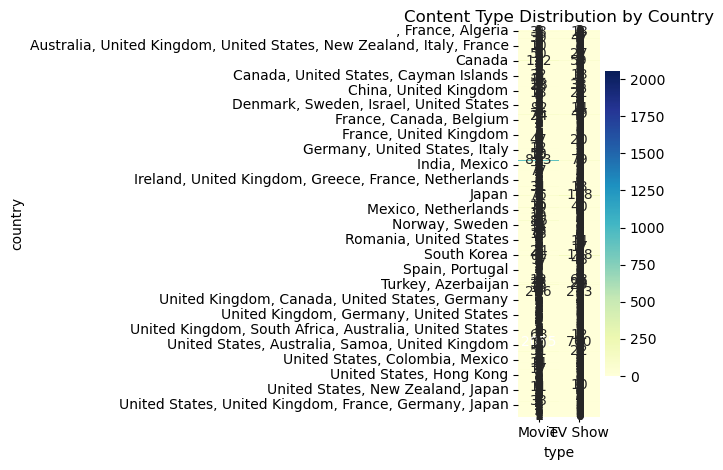

In [45]:
#Content Type Distribution by Country
country_type = df.groupby(['country', 'type']).size().unstack().fillna(0)
sns.heatmap(country_type, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Content Type Distribution by Country')
plt.tight_layout()
plt.show()


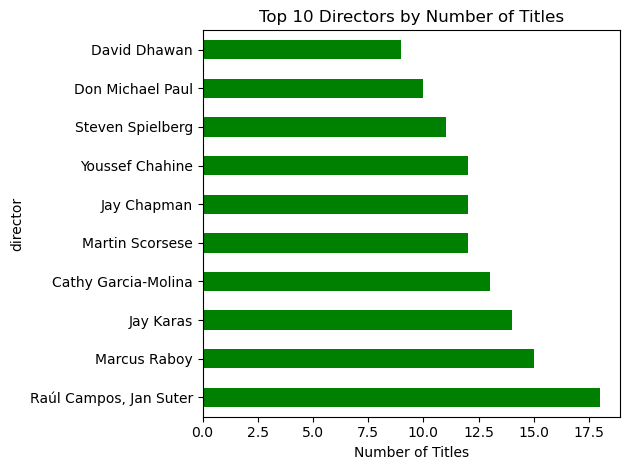

In [47]:
#Top 10 Directors by Number of Titles
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', color='green')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


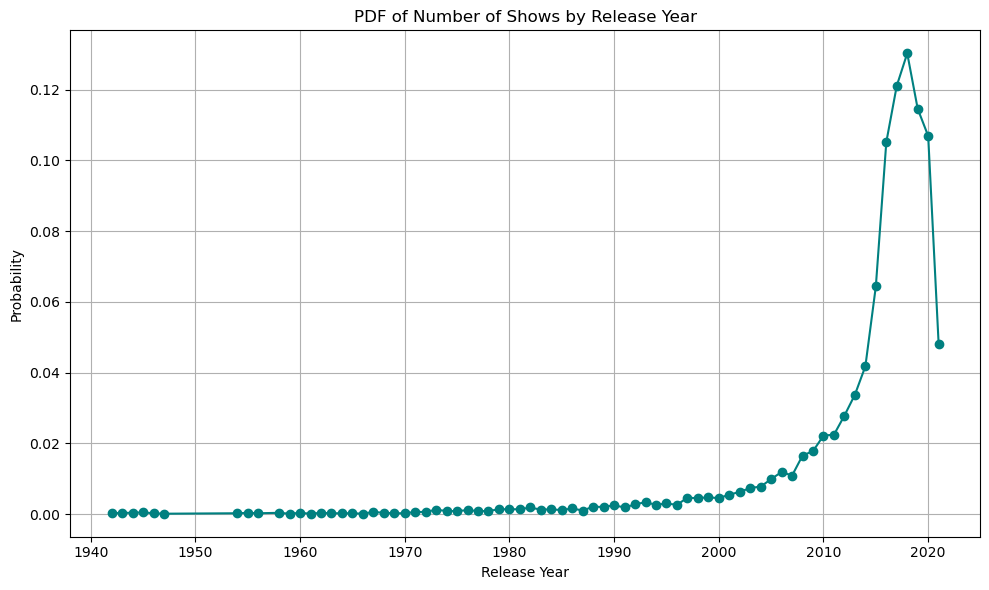

In [48]:
#PDF of Number of Shows by Release Year
release_counts = df['release_year'].value_counts().sort_index()
data = release_counts.values
pdf = data / sum(data)
plt.figure(figsize=(10, 6))
plt.plot(release_counts.index, pdf, marker='o', color='teal')
plt.title('PDF of Number of Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

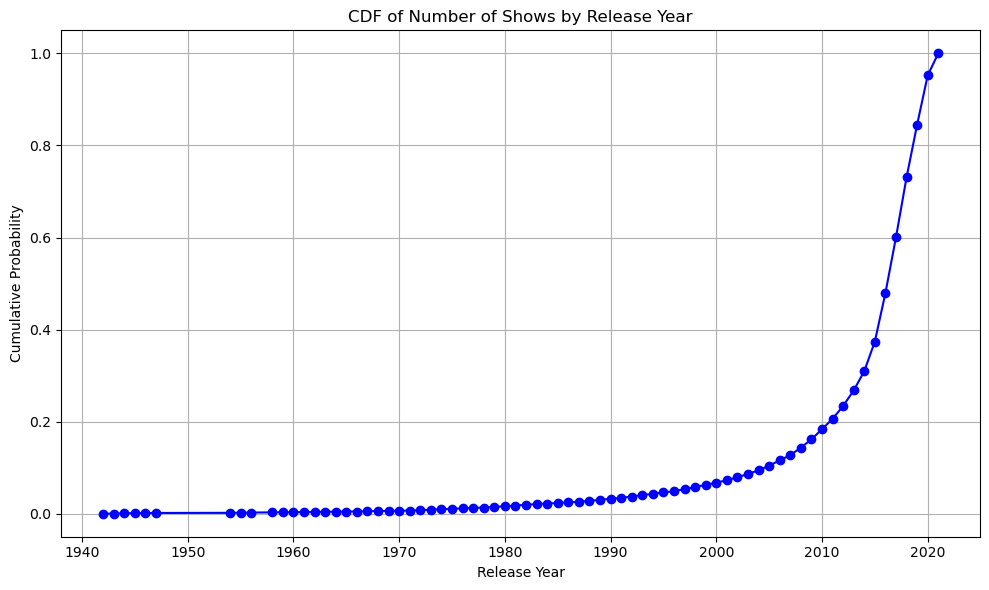

In [49]:
#CDF of Number of Shows by Release Year
cdf = pdf.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(release_counts.index, cdf, marker='o', color='blue')
plt.title('CDF of Number of Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

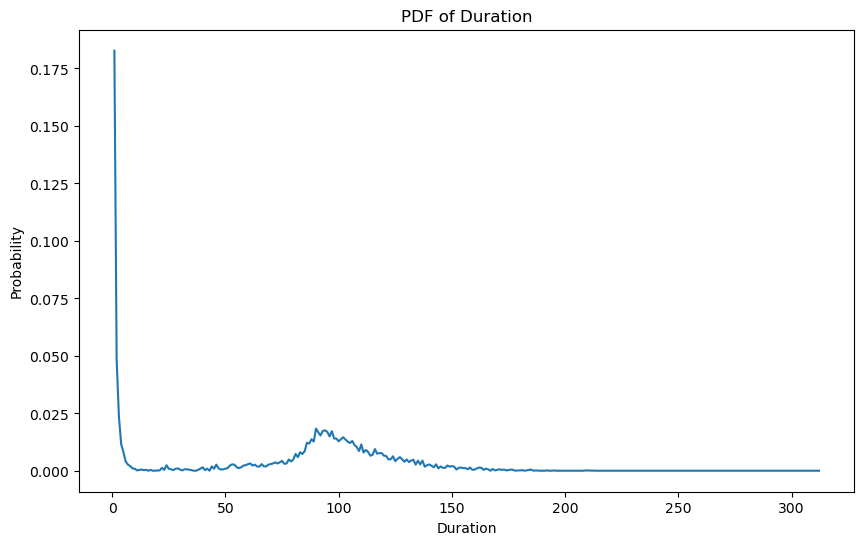

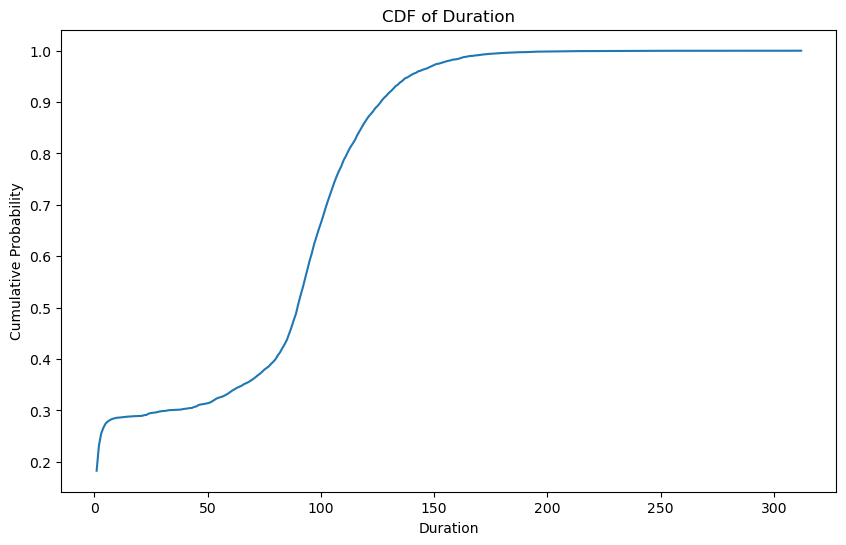

In [55]:
#PDF and CDF OF Duration
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(float)
data = df['duration_int'].dropna().sort_values()
# PDF
pdf = data.value_counts(normalize=True).sort_index()
pdf.plot(title='PDF of Duration', xlabel='Duration', ylabel='Probability', figsize=(10,6))
plt.show()
# CDF
cdf = pdf.cumsum()
cdf.plot(title='CDF of Duration', xlabel='Duration', ylabel='Cumulative Probability', figsize=(10,6))
plt.show()